# Neural Networks - Classifying flowers

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Read csv files containing extracted features from flower images

In [10]:
roses = pd.read_csv('rose_features.csv').drop('Unnamed: 0',1).values
butterflypeas = pd.read_csv('butterflypea_features.csv').drop('Unnamed: 0',1).values
chrysanthemums = pd.read_csv('chrysanthemum_features.csv').drop('Unnamed: 0',1).values

## Activation Functions

In [11]:
#sigmoid function
def g(a):
    return 1/(1+np.exp(-a))
def g_prime(a):
    return g(a)*(1-g(a))

#hyperbolic tangent
# def g(a):
#     return (np.exp(a)-np.exp(-a))/(np.exp(a)+np.exp(-a))
# def g_prime(a):
#     return 1+(g(a)**2)

#linear function
# def g(a):
#     return a
# def g_prime(a):
#     return 1

## Main Algorithm for Neural Networks

In [12]:
def neural_net(x_i,t_k,w_ji,w_kj):
    #hidden unit
    a_j = w_ji@x_i
    z_j = g(a_j)

    #output unit
    z_j[0] = 1
    a_k = np.sum(w_kj*z_j)
    y_k = g(a_k)

    #error of output units
    delta_k = g_prime(a_k)*(y_k-t_k)

    #error of hidden units
    delta_j = g_prime(a_j)*(delta_k*w_kj)

    #error derivatives
    error_kj = delta_k*z_j
    error_ji = np.copy(w_ji)
    for p in range(len(delta_j)):
        error_ji[p] = delta_j[p]*x_i

    #total sum of squares error
    E_q = ((y_k-t_k)**2)/2
    
    return E_q,error_ji,error_kj

### Set Expected Class Outputs for each flower type

In [13]:
t_k1 = 0.3 #roses
t_k2 = 0.6 #chrysanthemums
t_k3 = 0.9 #butterfly peas

### Initialize random weights

In [14]:
w_ji = np.random.random((roses.shape[1],roses.shape[1]+1))
w_kj = np.random.random(roses.shape[1])

### Running for one pattern

In [15]:
def pattern(Class,t_k,w_ji,w_kj):
    E = []
    E_kj = []
    E_ji = []

    for i in range(len(Class)):
        x_i = np.array([1] + Class[i].tolist())
        E_q,error_ji,error_kj = neural_net(x_i,t_k,w_ji,w_kj)
        E.append(E_q)
        E_ji.append(error_ji)
        E_kj.append(error_kj)
        
    return E,np.sum(E_kj,axis=0),np.sum(E_ji,axis=0)

## Applying Neural Network on Training Set

In [16]:
errors = []
counter = 0

while True:    
    E1,E_kj1,E_ji1 = pattern(roses[:np.int(len(roses)/2)],t_k1,w_ji,w_kj)
    E2,E_kj2,E_ji2 = pattern(chrysanthemums[:np.int(len(chrysanthemums)/2)],t_k2,w_ji,w_kj)
    E3,E_kj3,E_ji3 = pattern(butterflypeas[:np.int(len(butterflypeas)/2)],t_k3,w_ji,w_kj)

    #sum errors
    E = np.sum(E1+E2+E3)
    E_kj = E_kj1+E_kj2+E_kj3
    E_ji = E_ji1+E_ji2+E_ji3
    errors.append(E)

    #calculating change in weights
    learning_rate = 0.1
    delta_wji = -learning_rate*E_ji
    delta_wkj = -learning_rate*E_kj

    #change weights
    w_ji += delta_wji
    w_kj += delta_wkj
    
    #counting epochs
    counter += 1
    
    #minimizing error
    if E < 0.01:
        break

### Plot the convergence of the Neural Network on the training set

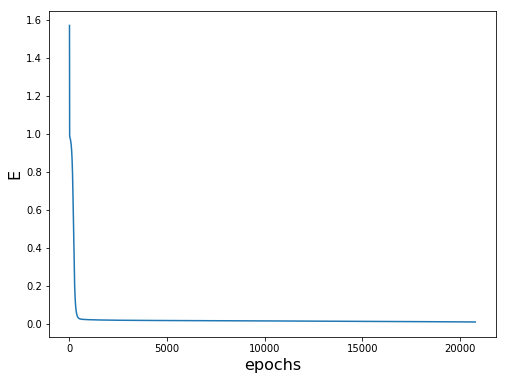

In [17]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(counter),errors)
plt.xlabel('epochs',fontsize=16)
plt.ylabel('E',fontsize=16)
# plt.savefig('tanh.png',dpi=300,bbox_inches='tight')
plt.show()

## Checking test set of flowers

In [11]:
def tester(x_i,w_ji,w_kj):
    x_i = np.array([1] + x_i.tolist())
    
    #hidden unit
    a_j = w_ji@x_i
    z_j = g(a_j)

    #output unit
    z_j[0] = 1
    a_k = z_j.T@w_kj
    y_k = g(a_k)
    
    return np.round(y_k,1)

## Classify Test set of roses

In [12]:
for i in range(np.int(len(roses)/2)):
    print(tester(roses[np.int(len(roses)/2):][i],w_ji,w_kj))

0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3


## Classify Test set of chrysanthemums

In [13]:
for i in range(np.int(len(chrysanthemums)/2)):
    print(tester(chrysanthemums[np.int(len(chrysanthemums)/2):][i],w_ji,w_kj))

0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6


## Classify Test set of butterfly peas

In [14]:
for i in range(np.int(len(butterflypeas)/2)):
    print(tester(butterflypeas[np.int(len(butterflypeas)/2):][i],w_ji,w_kj))

0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
